In [38]:
import Luna: Maths, PhysData
using  DelimitedFiles 
import PyPlot:pygui, plt
close("all")
pygui(true)

pres= 2.0
gas = :Ar

in_dir="input"
L = 3e-3
L_eff = 10e-3
p_ed = 1e-3

file_ρ    = "dens_$(pres)bar.dat"      # name of density profile data file 
path_ρ    = joinpath(in_dir, file_ρ)   # sys. path to density profile data file 

file_ρ_OLD    = "dens_$(pres)bar_OLD_CELL.dat"      # name of density profile data file 
path_ρ_OLD    = joinpath(in_dir, file_ρ_OLD)   # sys. path to density profile data file 

z_in = readdlm(path_ρ,' ', Float64, '\n')[:,1]        # read in spatial points 
ρ_in = readdlm(path_ρ,' ', Float64, '\n')[:,2]        # read in density data 

z_in_OLD = readdlm(path_ρ_OLD,' ', Float64, '\n')[:,1]        # read in spatial points 
ρ_in_OLD = readdlm(path_ρ_OLD,' ', Float64, '\n')[:,2]        # read in density data 

# temporarily centre on zero 
z_in = z_in .- maximum(z_in)/2
z_in_OLD = z_in_OLD .- maximum(z_in_OLD)/2

#z_coms0 = maximum(z_in)/2 - 1.5e-3

dens_coms = Maths.CSpline(z_in, ρ_in)                      # interpolate density function 
dens_coms_OLD = Maths.CSpline(z_in_OLD, ρ_in_OLD)                      # interpolate density function 
    
Z= (-L/2, 0, L/2)                                        # define points for pressure gradient
P= (p_ed, pres, p_ed)  # define values for pressure gradient (see "p_const" above)
(coren,dens_grad)=Capillary.gradient(gas,Z,P)              # gives n(ω; z) and ρ(z) from pressure profile          

zarr = range(-L_eff, L_eff, 500)
zarr_OLD = zarr
zarr_grad = range(-L/2, L/2, 500)

ρ_grad =   [dens_grad(z) for z in zarr_grad] ./ PhysData.N_A
ρ_coms=    [dens_coms(z) for z in zarr]  ./ PhysData.N_A
ρ_coms_OLD= [dens_coms_OLD(z) for z in zarr_OLD]  ./ PhysData.N_A


rcParams = PyDict(matplotlib."rcParams") # get rcParams 
rcParams["text.usetex"] = true # enable LaTeX renadering
rcParams["mathtext.fontset"] = "cm" # use LateX font for maths
rcParams["font.family"] = "STIXGeneral" # use LateX font for text
rcParams["font.size"] = 16 # set standard font size 
fig_dim = 2* [3.14961, 2.3622075] # for 8cm width ; double for 16cm width

plt.figure(figsize=fig_dim)
plt.subplots_adjust(bottom=0.12)
plt.plot(zarr*1e3 .+L_eff*1e3,  ρ_coms_OLD, label="old cell", color="blue")
plt.plot(zarr_OLD*1e3 .+L_eff*1e3, ρ_coms, label="new chip", color="red")
plt.plot(zarr_grad*1e3 .+ L_eff*1e3, ρ_grad, label="gradient", color="black")
plt.xlabel("Cell position (mm)")
plt.ylabel("Number density (mol/m³)")
plt.legend()
plt.savefig(joinpath("manuscript_spectra", "old_new_comp.png"), dpi=1000)
plt.savefig(joinpath("manuscript_spectra", "old_new_comp.pdf"))
plt.show()


In [16]:
gas_arr = [:Ar, :Ne, :He, :Kr, :Xe, :N2, :N2O]
dens_grad_arr = [Capillary.gradient(gas,Z,P)[2] for gas in gas_arr]
c_arr = ["black", "grey", "blue", "cyan", "orange", "green", "purple"]

plt.title("Comparison of different gas profiles at $(pres)bar")
plt.xlabel("Cell position (mm)")
plt.ylabel("Number density (1/m³)")
for i in 1:length(gas_arr)
    ρ_grad = [dens_grad_arr[i](z) for z in zarr]
    plt.plot(zarr*1e3, ρ_grad, label="$(gas_arr[i])", color=c_arr[i])
end   
plt.plot(zarr*1e3, ρ_coms, label="COMSOL", color="red")
plt.legend()
plt.savefig(joinpath("output", "gas_dens_comp.png"), dpi=1000)
plt.show()


In [7]:
using Luna 
using  DelimitedFiles

in_dir = "input"
file_IR_spec = "IRspec.dat"                   # name of IR FROG input spectrum file 
path_IR_spec = joinpath(in_dir, file_IR_spec) # sys. path to IR FROG input spectrum file
 
λ = readdlm(path_IR_spec,' ', Float64, '\n')[:,1]             # read in IR input wavelength data [FROG]
I = readdlm(path_IR_spec,' ', Float64, '\n')[:,2]             # read in IR input spectral data [FROG]

#λ0 = Maths.moment(I, λ, 1) / Maths.moment(I,λ,0)

λ0 = sum(λ .* I) / sum(I) *1e9 


741.5133172034373

In [4]:
import Luna: Capillary, PhysData
import PyPlot:pygui, plt, PyDict, matplotlib
close("all")
pygui(true)

gas = :Ar

dir="manuscript_spectra"
L = 3e-3
p_ed = 1e-3

rcParams = PyDict(matplotlib."rcParams") # get rcParams 
rcParams["text.usetex"] = true # enable LaTeX renadering
rcParams["mathtext.fontset"] = "cm" # use LateX font for maths
rcParams["font.family"] = "STIXGeneral" # use LateX font for text
rcParams["font.size"] = 16 # set standard font size 
fig_dim = 2* [3.14961, 2.3622075] # for 8cm width ; double for 16cm width

pres= 0.4
pres2 = 1.0
pres3 = 1.5 
pres4 = 2.0 

Z= (0, L/2, L)                                        # define points for pressure gradient
P= (p_ed, pres, p_ed) 
P2= (p_ed, pres2, p_ed)
P3= (p_ed, pres3, p_ed)
P4= (p_ed, pres4, p_ed)                                # define values for pressure gradient (see "p_const" above)
(coren,dens_grad)=Capillary.gradient(gas,Z,P) 
(coren,dens_grad2)=Capillary.gradient(gas,Z,P2) 
(coren,dens_grad3)=Capillary.gradient(gas,Z,P3) 
(coren,dens_grad4)=Capillary.gradient(gas,Z,P4)              # gives n(ω; z) and ρ(z) from pressure profile   
       
zarr = range(0, L, 100)

ρ_grad =   [dens_grad(z) for z in zarr] ./ PhysData.N_A
ρ_grad2 =   [dens_grad2(z) for z in zarr] ./ PhysData.N_A
ρ_grad3 =   [dens_grad3(z) for z in zarr] ./ PhysData.N_A
ρ_grad4 =   [dens_grad4(z) for z in zarr] ./ PhysData.N_A

plt.figure(figsize=fig_dim)
plt.subplots_adjust(bottom=0.12)
plt.plot(zarr*1e3, ρ_grad, label="$(pres)bar", color="blue")
plt.plot(zarr*1e3, ρ_grad2, label="$(pres2)bar", color="black")
plt.plot(zarr*1e3, ρ_grad3, label="$(pres3)bar", color="red")
plt.plot(zarr*1e3, ρ_grad4, label="$(pres4)bar", color="green")

plt.xlabel("Cell position (mm)")
plt.ylabel("Number density (mol/m³)")
plt.legend()
plt.savefig(joinpath(dir, "grad_model.png"), dpi=1000)
plt.savefig(joinpath(dir, "grad_model.pdf"))
plt.show()


In [3]:
import numpy as np
import os 
import pandas as pd 

in_dir  = "raw_input"    # name of input directory containing the raw data
out_dir = "measured_p_scans"

for file in os.listdir(in_dir):

    # used for Argon as well as Ne: 2.0bar, 4.0bar, 4.5bar
    if (file[:2]=="Ne" and (file[9:12]=="2.0" or file[9:12]=="4.0") ) or file[:2]=="Ar":
        arr = np.loadtxt(os.path.join(in_dir, file), usecols=(0,1), skiprows=14)
        arr[:,0] *= 1e-9
        for i in np.arange(len(arr[:,1])):
            if arr[i,1] < 0:
                arr[i,1]=0

        np.savetxt(os.path.join(out_dir, file),arr)
    elif file[:2]=="Ne":

        df = pd.read_table(os.path.join(in_dir, file), usecols=(0,1), skiprows=14,decimal=',')
        arr = df.to_numpy(dtype="float")

        arr[:,0] *= 1e-9
        for i in np.arange(len(arr[:,1])):
            if arr[i,1] < 0:
                arr[i,1]=0

        np.savetxt(os.path.join(out_dir, file),arr)

In [17]:
import numpy as np
import os
out_dir = "measured_p_scans"

N =8 #12  
data = np.empty(shape=(N,3), dtype="object")
p_arr =[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]#[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.2, 1.4, 1.6] # #

for i in np.arange(N):

    tmp_arr = np.loadtxt(os.path.join(out_dir,"Ne_400mW_"+str(p_arr[i])+"bar.txt"))
    lam = tmp_arr[:,0]
    I = tmp_arr[:,1]

    data[i,0] = p_arr[i] 
    data[i,1] = lam 
    data[i,2] = I 

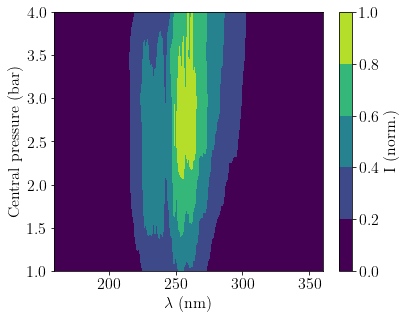

In [18]:
import matplotlib.pyplot as plt 
import numpy as np

# plot settings 
show = True           # if True: open plots in matplotlib GUI; if False: don't show plots (directly write to file) 
save = True           # if True: saves plots 
show_title = False     # if False: no titles shown 
norm = True           # if True: norm spectra 
disable_latex = False # if True: disable LaTeX rendering 
use_pdf = True        # if True: save plots as pdf; else: use png

# set plot formatting 
if disable_latex == False : plt.rcParams["text.usetex"] = True   # enable LaTeX renadering
plt.rcParams["mathtext.fontset"] = "cm" # use LateX font for maths
plt.rcParams["font.family"] = "STIXGeneral" # use LateX font for text
plt.rcParams["font.size"] = 16 # set standard font size 
fig_dim = [2 * 3.14961,2* 2.3622075] # for 8cm width ; double for 16cm width

plt.figure(figsize=fig_dim) 
if show_title: plt.title("??")
plt.subplots_adjust(top=0.9, bottom=0.14, left=0.16)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel("Central pressure (bar)")

I_2d= np.empty((len(data[0,1]), len(data[:,0])), dtype="float")
for i in np.arange(len(data[0,1])):      # lam
    for j in np.arange(len(data[:,0])):  # pres 
        I_2d[i,j] = data[j, 2][i] 

X, Y = np.meshgrid(data[0,1].astype("float")*1e9, data[:,0].astype("float"))  
I_2d = np.swapaxes(I_2d,0,1) 

if norm: 
    plt.contourf(X, Y, I_2d/np.max(I_2d), 5, vmin=0.1)
else:
    plt.pcolormesh(X, Y, I_2d)    

plt.colorbar(label="I (arb. units)" if norm==False else "I (norm.)")
plt.xlim(159,360)
plt.ylim(1.0,4.0) # for Ne

if save: 
    if use_pdf:
        plt.savefig(os.path.join(out_dir,"2d_spectra_pres_Ne_400mW_meas.pdf"))
        plt.savefig(os.path.join(out_dir,"2d_spectra_pres_Ne_400mW_meas.png"),dpi=1000)
    else:
        plt.savefig(os.path.join(out_dir,"2d_spectra_pres_Ne_400mW_meas.png"),dpi=1000)    

if show: plt.show()

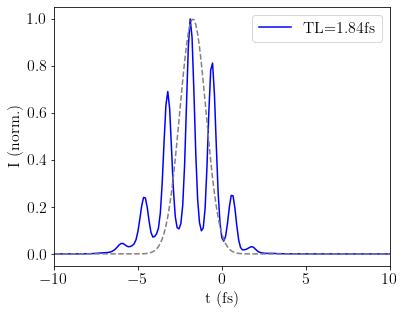

In [63]:
### temporal plots 

import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit

out_dir = "manuscript_spectra"
in_dir = out_dir 

file = "temporal_Ne_no_ion.txt"

# set plot formatting 
plt.rcParams["text.usetex"] = True   # enable LaTeX renadering
plt.rcParams["mathtext.fontset"] = "cm" # use LateX font for maths
plt.rcParams["font.family"] = "STIXGeneral" # use LateX font for text
plt.rcParams["font.size"] = 16 # set standard font size 
fig_dim = [2 * 3.14961,2* 2.3622075] # for 8cm width ; double for 16cm width

# extract data 
arr = np.loadtxt(os.path.join(in_dir, file))
t = arr[:,0] 
I = arr[:,1]

# define Gaussian fit function 
def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2.*sigma**2))
p0 = [-5*1e-15, 20*1e-15]

# fit Gaussian 
coeff, _ = curve_fit(gauss, t, I,p0=p0)


tau = coeff[1] * 2.355

# set up figure
plt.figure(figsize=fig_dim) 
plt.subplots_adjust(top=0.9, bottom=0.14, left=0.16)
plt.xlabel('t (fs)')
plt.ylabel("I (norm.)")
plt.plot(t*1e15, I, color="blue", label=r'TL={0:.2f}fs'.format(np.abs(tau*1e15)))
plt.plot(t*1e15, gauss(t, coeff[0],coeff[1]), color="grey", ls="--") 
plt.legend()
plt.xlim(-10,10)

plt.savefig(os.path.join(out_dir,"temporal_Ne_no_ion.pdf"))
plt.savefig(os.path.join(out_dir,"temporal_Ne_no_ion.png"),dpi=1000)
      
plt.show()

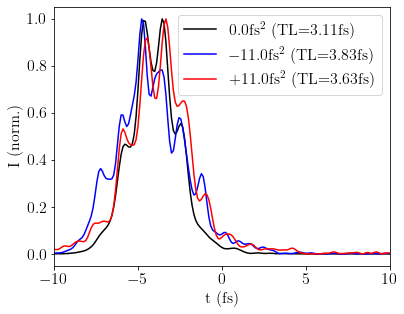

In [68]:
### temporal plots 

import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit

out_dir = "manuscript_spectra"
in_dir = out_dir 

file = "temporal_Ar.txt"
file_neg = "temporal_Ar_neg_chirp.txt"
file_pos = "temporal_AR_pos_chirp.txt"

# set plot formatting 
plt.rcParams["text.usetex"] = True   # enable LaTeX renadering
plt.rcParams["mathtext.fontset"] = "cm" # use LateX font for maths
plt.rcParams["font.family"] = "STIXGeneral" # use LateX font for text
plt.rcParams["font.size"] = 16 # set standard font size 
fig_dim = [2 * 3.14961,2* 2.3622075] # for 8cm width ; double for 16cm width

# extract data 
arr = np.loadtxt(os.path.join(in_dir, file))
arr_neg = np.loadtxt(os.path.join(in_dir, file_neg))
arr_pos = np.loadtxt(os.path.join(in_dir, file_pos))
t, t_neg, t_pos = arr[:,0], arr_neg[:,0] , arr_pos[:,0]  
I, I_neg, I_pos = arr[:,1], arr_neg[:,1], arr_pos[:,1]

# define Gaussian fit function 
def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2.*sigma**2))
p0 = [-5*1e-15, 2*1e-15]

# fit Gaussian 
coeff, _ = curve_fit(gauss, t, I,p0=p0)
coeff_neg, _ = curve_fit(gauss, t_neg, I_neg,p0=p0)
coeff_pos, _ = curve_fit(gauss, t_pos, I_pos,p0=p0)

tau = coeff[1] * 2.355
tau_neg = coeff_neg[1] * 2.355
tau_pos = coeff_pos[1] * 2.355

# set up figure
plt.figure(figsize=fig_dim) 
plt.subplots_adjust(top=0.9, bottom=0.14, left=0.16)
plt.xlabel('t (fs)')
plt.ylabel("I (norm.)")
plt.plot(t*1e15, I, color="black", label=r'0.0fs$^2$ (TL={0:.2f}fs)'.format(np.abs(tau*1e15)))
plt.plot(t_neg*1e15, I_neg, color="blue", label=r'$-$11.0fs$^2$ (TL={0:.2f}fs)'.format(np.abs(tau_neg*1e15)))
plt.plot(t_pos*1e15, I_pos, color="red", label=r'+11.0fs$^2$ (TL={0:.2f}fs)'.format(np.abs(tau_pos*1e15)))
#plt.plot(t*1e15, gauss(t, coeff[0],coeff[1]), color="grey", ls="--") 
#plt.plot(t*1e15, gauss(t, coeff_neg[0],coeff_neg[1]), color="grey", ls="--") 
#plt.plot(t*1e15, gauss(t, coeff_pos[0],coeff_pos[1]), color="grey", ls="--") 
plt.legend()
plt.xlim(-10,10)

plt.savefig(os.path.join(out_dir,"temporal_Ar_chirp.pdf"))
plt.savefig(os.path.join(out_dir,"temporal_Ar_chirp.png"),dpi=1000)
      
plt.show()

In [ ]:
### temporal plots 

import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit

out_dir = "manuscript_spectra"
in_dir = out_dir 

file_new = "temporal_Ar.txt"
file_old = "temporal_Ar_neg_chirp.txt"
file_pos = "temporal_AR_pos_chirp.txt"

# set plot formatting 
plt.rcParams["text.usetex"] = True   # enable LaTeX renadering
plt.rcParams["mathtext.fontset"] = "cm" # use LateX font for maths
plt.rcParams["font.family"] = "STIXGeneral" # use LateX font for text
plt.rcParams["font.size"] = 16 # set standard font size 
fig_dim = [2 * 3.14961,2* 2.3622075] # for 8cm width ; double for 16cm width

# extract data 
arr = np.loadtxt(os.path.join(in_dir, file))
arr_neg = np.loadtxt(os.path.join(in_dir, file_neg))
arr_pos = np.loadtxt(os.path.join(in_dir, file_pos))
t, t_neg, t_pos = arr[:,0], arr_neg[:,0] , arr_pos[:,0]  
I, I_neg, I_pos = arr[:,1], arr_neg[:,1], arr_pos[:,1]

# define Gaussian fit function 
def gauss(x, mu, sigma):
    return np.exp(-(x-mu)**2/(2.*sigma**2))
p0 = [-5*1e-15, 2*1e-15]

# fit Gaussian 
coeff, _ = curve_fit(gauss, t, I,p0=p0)
coeff_neg, _ = curve_fit(gauss, t_neg, I_neg,p0=p0)
coeff_pos, _ = curve_fit(gauss, t_pos, I_pos,p0=p0)

tau = coeff[1] * 2.355
tau_neg = coeff_neg[1] * 2.355
tau_pos = coeff_pos[1] * 2.355

# set up figure
plt.figure(figsize=fig_dim) 
plt.subplots_adjust(top=0.9, bottom=0.14, left=0.16)
plt.xlabel('t (fs)')
plt.ylabel("I (norm.)")
plt.plot(t*1e15, I, color="black", label=r'0.0fs$^2$ (TL={0:.2f}fs)'.format(np.abs(tau*1e15)))
plt.plot(t_neg*1e15, I_neg, color="blue", label=r'$-$11.0fs$^2$ (TL={0:.2f}fs)'.format(np.abs(tau_neg*1e15)))
plt.plot(t_pos*1e15, I_pos, color="red", label=r'+11.0fs$^2$ (TL={0:.2f}fs)'.format(np.abs(tau_pos*1e15)))
#plt.plot(t*1e15, gauss(t, coeff[0],coeff[1]), color="grey", ls="--") 
#plt.plot(t*1e15, gauss(t, coeff_neg[0],coeff_neg[1]), color="grey", ls="--") 
#plt.plot(t*1e15, gauss(t, coeff_pos[0],coeff_pos[1]), color="grey", ls="--") 
plt.legend()
plt.xlim(-10,10)

plt.savefig(os.path.join(out_dir,"temporal_Ar_chirp.pdf"))
plt.savefig(os.path.join(out_dir,"temporal_Ar_chirp.png"),dpi=1000)
      
plt.show()